In [1]:
# pip install cmocean

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [3]:
import datetime
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import time
import xarray as xr

from matplotlib import colors
import pickle

import math
import cmocean
# import cartopy.crs as ccrs
# import cartopy.mpl.ticker as cticker
# import cartopy
# import cartopy.io.shapereader as shpreader

In [4]:
# Change to the desired directory
new_dir = 'C:/Users/mfregona/OneDrive - University of Helsinki/Downloads_temporary/Lake-Analyzer-master/Lake-Analyzer-master/AS_KVJ_1223'
os.chdir(new_dir)
LAM_results = pd.read_csv('Kuivajarvi_results_1223_matlab.csv', sep=',')
df_LAM_results = pd.DataFrame(LAM_results)
df_LAM_results['DateTime']=pd.to_datetime(df_LAM_results['DateTime'])
df_LAM_results.loc[df_LAM_results['St'].isna(), 'thermD'] = np.nan
# df_LAM_results.to_csv('Kuivajarvi_results_1223.csv', sep=',', na_rep='NaN')

In [5]:
# read turnover dates
turnover_periods = pd.read_csv('Turnover_dates.csv',sep=';',names=["Year","Month","Day","Hour","Minute"],na_values=['','','NaN'])

# Fill missing Hour and Minute values with default (00)
turnover_periods['Hour'].fillna(0, inplace=True)
turnover_periods['Minute'].fillna(0, inplace=True)

turnover_periods['datetime'] = pd.to_datetime(turnover_periods[['Year','Month','Day','Hour','Minute']])
turnover_periods = turnover_periods[['datetime']]

df_overturn_FCO2 = pd.DataFrame()
df_overturn_time = pd.DataFrame()
# print(turnover_periods)

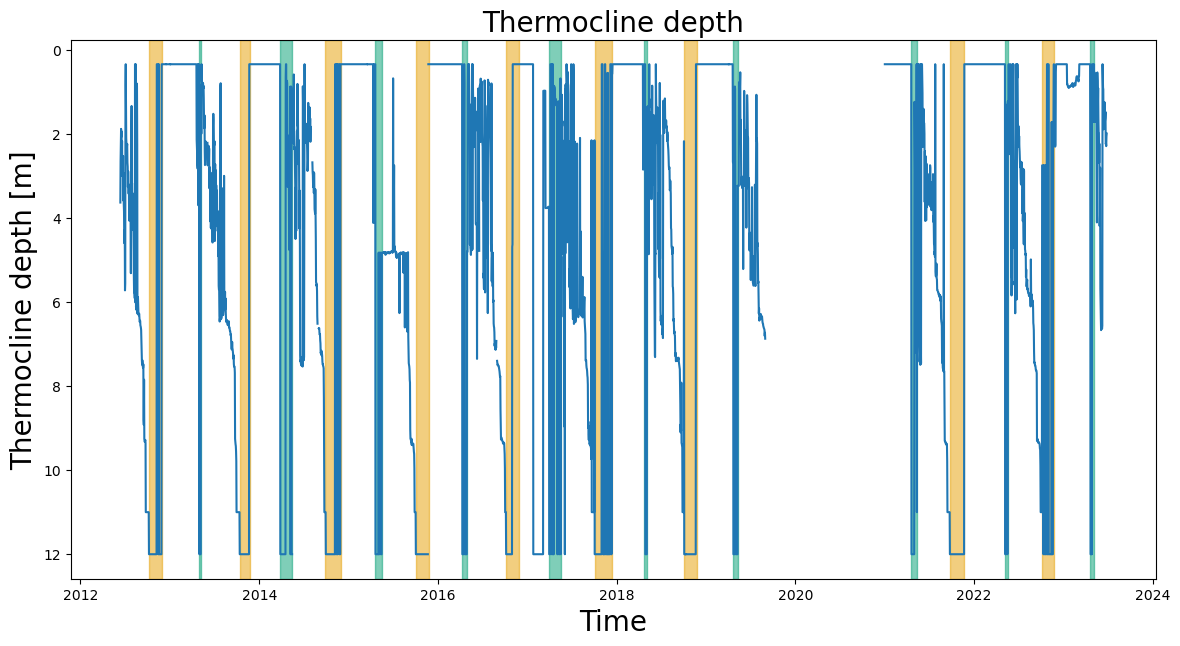

In [6]:
# plot timeseries
fig = plt.subplots(figsize=(14,7))
plt.plot(df_LAM_results['DateTime'],df_LAM_results['thermD'])
plt.gca().invert_yaxis()
# plt.xlim([datetime.datetime(2014,1,1), datetime.datetime(2014,12,31)]) 
colors = ["#009e73","#e69f00"]
# plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Thermocline depth [m]', fontsize=20)
plt.title('Thermocline depth', fontsize=20)


for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],alpha=0.5)

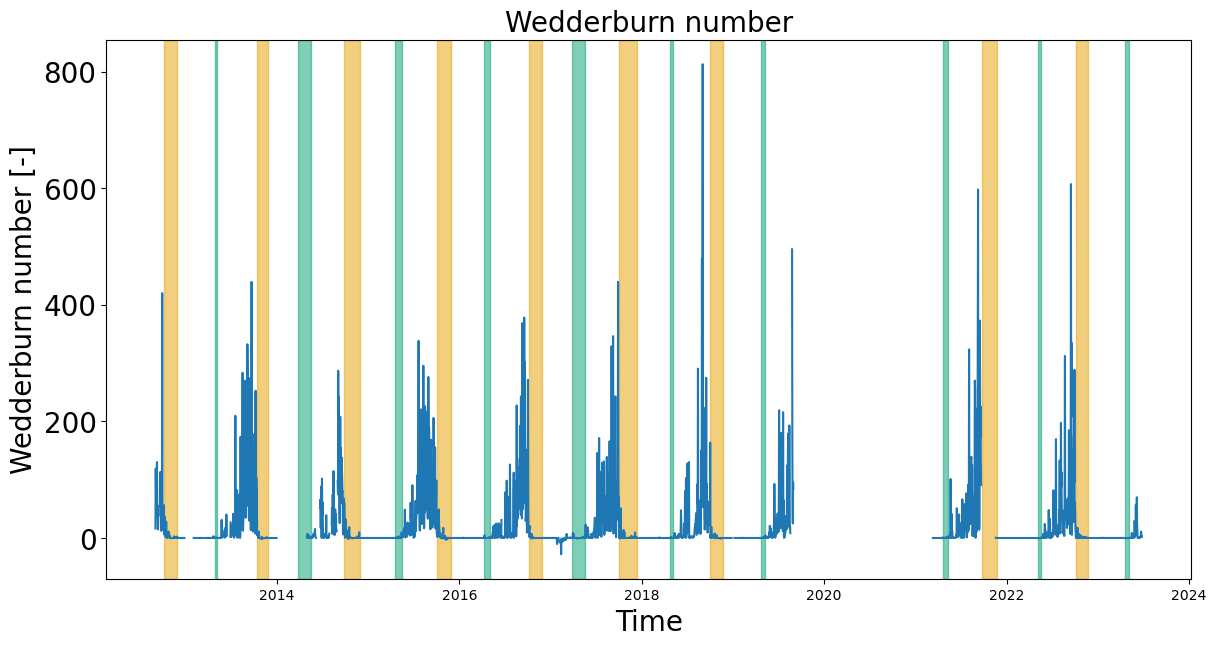

In [7]:
# plot timeseries
fig = plt.subplots(figsize=(14,7))
plt.plot(df_LAM_results['DateTime'],df_LAM_results['W'])

# plt.xlim([datetime.datetime(2013,1,1), datetime.datetime(2013,12,31)]) 
# plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Wedderburn number [-]', fontsize=20)
plt.title('Wedderburn number', fontsize=20)


for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],alpha=0.5)

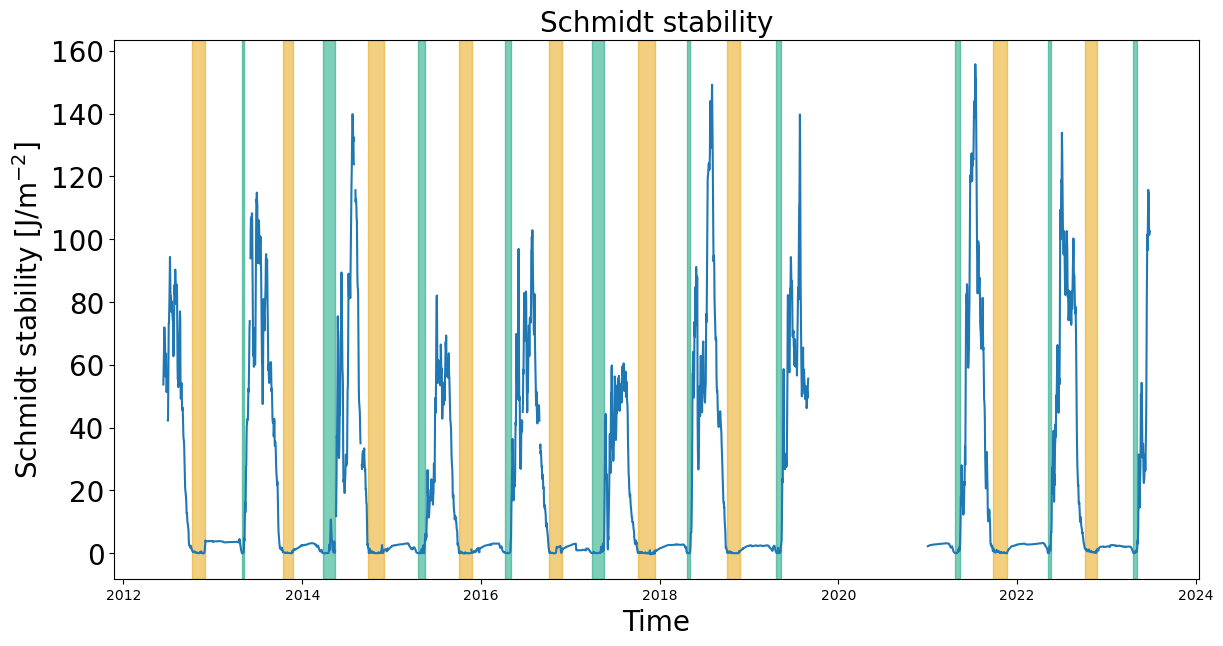

In [8]:
# plot timeseries
fig = plt.subplots(figsize=(14,7))
plt.plot(df_LAM_results['DateTime'],df_LAM_results['St'])
# plt.xlim([datetime.datetime(2013,1,1), datetime.datetime(2013,12,31)]) 
# plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Schmidt stability [J/$\mathrm{m^{-2}}$]', fontsize=20)
plt.title('Schmidt stability', fontsize=20)


for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],alpha=0.5)

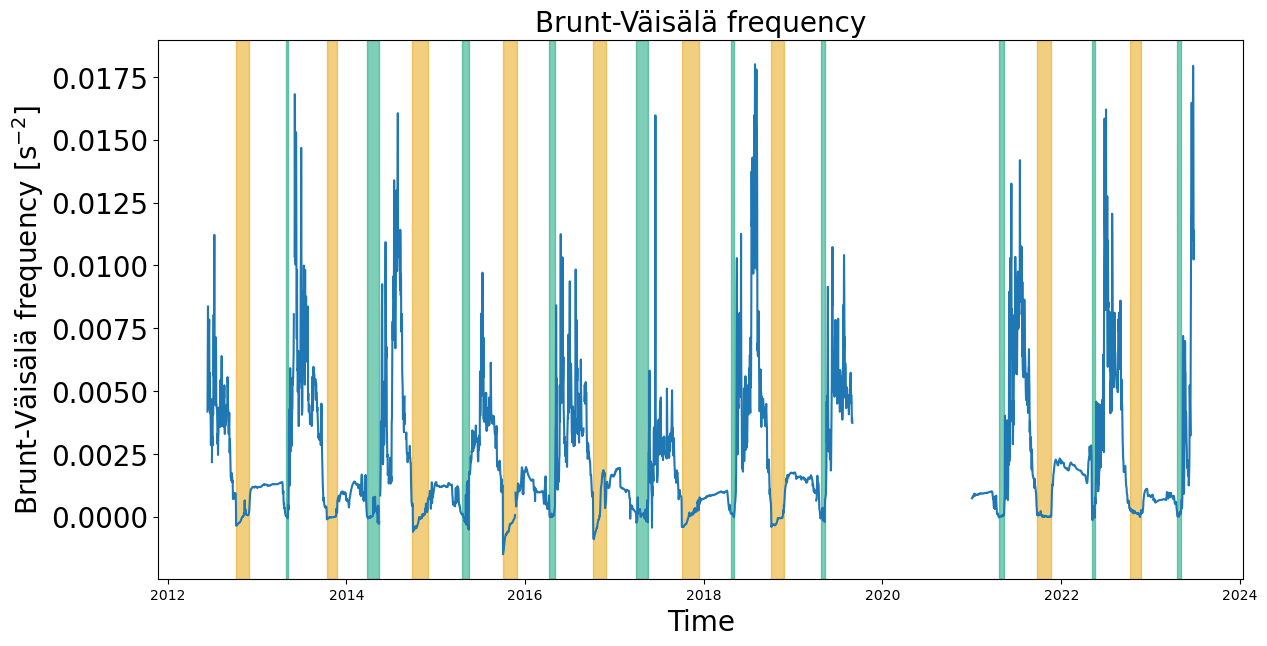

In [9]:
# plot timeseries
fig = plt.subplots(figsize=(14,7))
plt.plot(df_LAM_results['DateTime'],df_LAM_results['N2'])
# plt.xlim([datetime.datetime(2013,1,1), datetime.datetime(2013,12,31)]) 
# plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Brunt-Väisälä frequency [$\mathrm{s^{-2}}$]', fontsize=20)
plt.title('Brunt-Väisälä frequency', fontsize=20)


for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],alpha=0.5)

CONTOUR PLOT WATER T

In [10]:
new_dir = 'Z:/Desktop/AS_Matlab/';
os.chdir(new_dir)
# import waterT data
dat = pd.read_csv('waterT_SMEAR_Kuivajarvi_120101_230630_30min.csv',sep=',')

In [11]:
dat['datetime'] = pd.to_datetime(dat[['Year','Month','Day','Hour','Minute','Second']])
dat = dat.set_index('datetime')
dat = dat.drop(columns=['Year','Month','Day','Hour','Minute','Second'])
print(dat)

                     KVJ_META.Tw100  KVJ_META.Tw15  KVJ_META.Tw05  \
datetime                                                            
2012-01-01 00:00:00             NaN            NaN            NaN   
2012-01-01 00:30:00             NaN            NaN            NaN   
2012-01-01 01:00:00             NaN            NaN            NaN   
2012-01-01 01:30:00             NaN            NaN            NaN   
2012-01-01 02:00:00             NaN            NaN            NaN   
...                             ...            ...            ...   
2023-06-30 21:30:00             NaN            NaN            NaN   
2023-06-30 22:00:00             NaN            NaN            NaN   
2023-06-30 22:30:00             NaN            NaN            NaN   
2023-06-30 23:00:00             NaN            NaN            NaN   
2023-06-30 23:30:00             NaN            NaN            NaN   

                     KVJ_META.Tw120  KVJ_META.Tw20  KVJ_META.Tw10  \
datetime                         

In [12]:
times = dat.index.values

df = dat.reset_index().melt(id_vars=['datetime'], var_name='depth', value_name='values')   
df['depth'] = df['depth'].str.extract('(\d+)').astype(int)
df['depth'] = df['depth']/10
print(df['depth'])

0          10.0
1          10.0
2          10.0
3          10.0
4          10.0
           ... 
3224827     7.0
3224828     7.0
3224829     7.0
3224830     7.0
3224831     7.0
Name: depth, Length: 3224832, dtype: float64


In [13]:
df= df.set_index(['datetime', 'depth'])
df= df.sort_index(level='depth')

In [14]:
# T at all depths
# for d in np.unique(df.index.get_level_values(1)):
        # surf_temp = df[df.index.get_level_values(1) == d]
    
        # plt.plot(surf_temp.index.get_level_values(0), surf_temp.values,label='depth = '+str(d))
# plt.legend()
# plt.show()

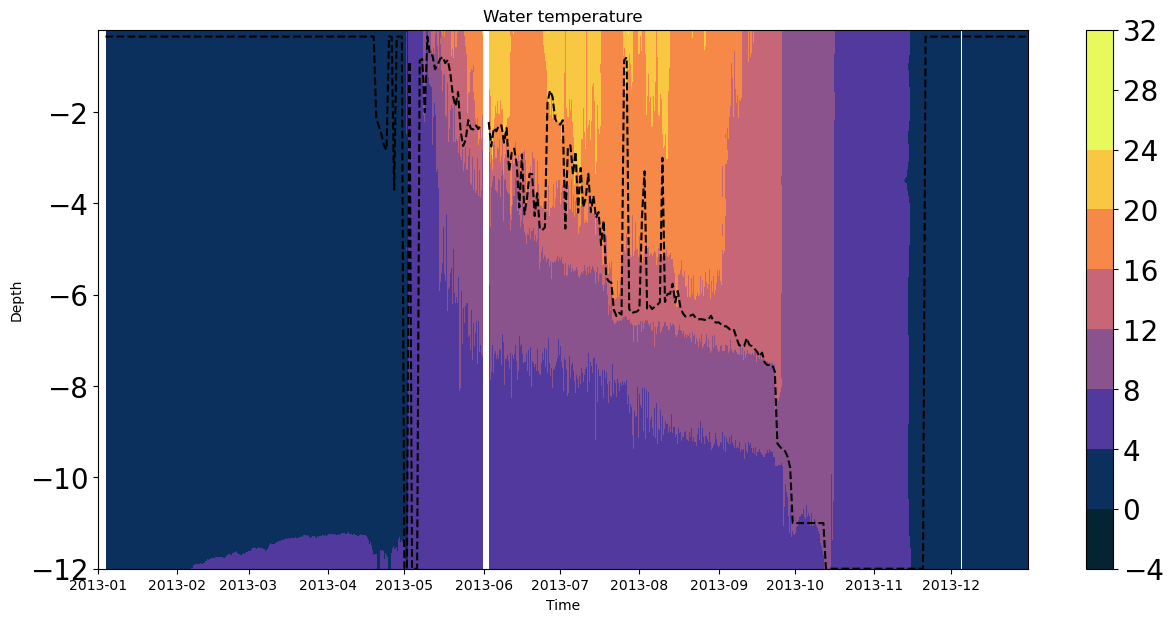

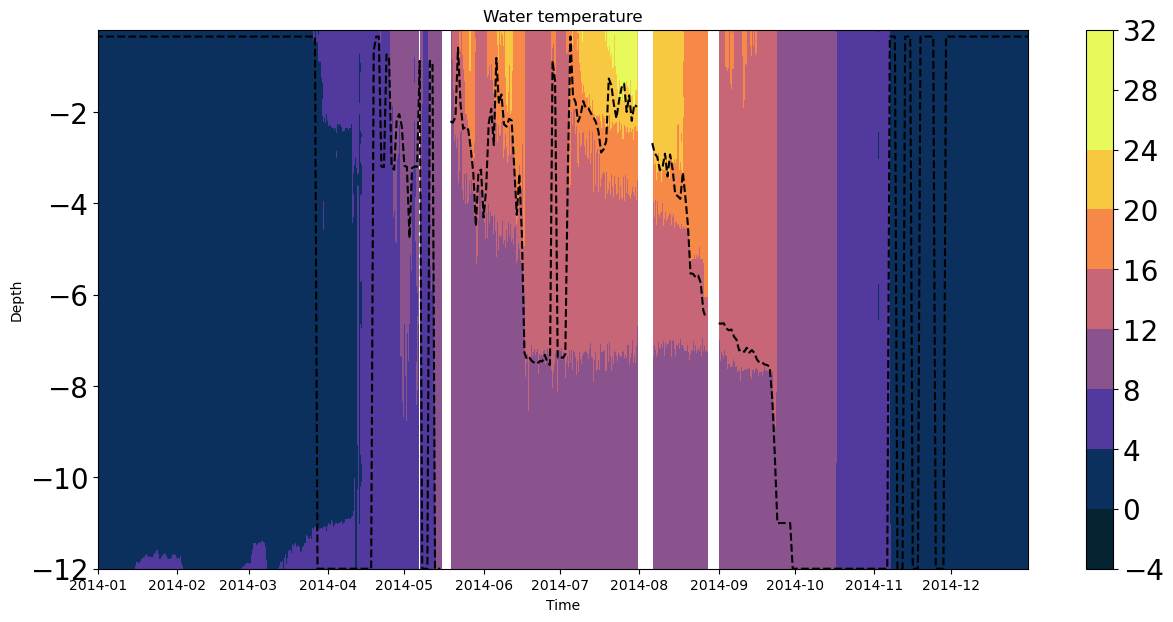

In [15]:
t = len(np.unique(df.index.get_level_values(0)))
d = 16
    
z = df.values.reshape(d, t)
x=np.unique(df.index.get_level_values(0))
y=np.unique(df.index.get_level_values(1))
X, Y = np.meshgrid(x,-y)
    
vmin, vmax = 0, 25
    
cmap = cmocean.cm.thermal
plt.figure(figsize=(15,7))
plt.contourf(X, Y, z,cmap=cmap, vmin=vmin, vmax=vmax)
plt.plot(df_LAM_results['DateTime'],-df_LAM_results['thermD'],'--',color='k')
plt.title('Water temperature')
plt.xlabel('Time')
plt.ylabel('Depth')
#   a = plt.contour(X, Y, z,cmap=cmap, vmin=vmin, vmax=vmax)
plt.xlim([datetime.datetime(2013,1,1), datetime.datetime(2013,12,31)]) 
plt.colorbar()
plt.show()

plt.figure(figsize=(15,7))
plt.contourf(X, Y, z,cmap=cmap, vmin=vmin, vmax=vmax)
plt.plot(df_LAM_results['DateTime'],-df_LAM_results['thermD'],'--',color='k')
plt.title('Water temperature')
plt.xlabel('Time')
plt.ylabel('Depth')
#   a = plt.contour(X, Y, z,cmap=cmap, vmin=vmin, vmax=vmax)
plt.xlim([datetime.datetime(2014,1,1), datetime.datetime(2014,12,31)]) 
plt.colorbar()
plt.show()

CONTOUR PLOT CO2

In [16]:
# dat_CO2 = pd.read_csv('waterT_SMEAR_Kuivajarvi_120101_230630_30min.csv',sep=',')
dat_CO2 = pd.read_pickle('water_co2_kuivajarvi.pkl', compression='infer', storage_options=None)
print(dat_CO2)

                     KVJ_META.CO2w70  KVJ_META.CO2w25  KVJ_META.CO2w02  \
timestamp                                                                
2012-01-01 00:00:00              NaN              NaN              NaN   
2012-01-01 00:30:00              NaN              NaN              NaN   
2012-01-01 01:00:00              NaN              NaN              NaN   
2012-01-01 01:30:00              NaN              NaN              NaN   
2012-01-01 02:00:00              NaN              NaN              NaN   
...                              ...              ...              ...   
2024-10-09 21:30:00       1603.22333       1569.52333       1397.40000   
2024-10-09 22:00:00       1603.71667       1570.68000       1390.21667   
2024-10-09 22:30:00       1605.66667       1569.38667       1384.12667   
2024-10-09 23:00:00       1606.53667       1569.64667       1378.64333   
2024-10-09 23:30:00       1608.16667       1570.34333       1373.18333   

                     KVJ_META.CO2w15 

In [17]:
times_CO2 = dat_CO2.index.values

In [18]:
# reset index turning it into a regular column
df_CO2 = dat_CO2.reset_index().melt(id_vars=['timestamp'], var_name='depth', value_name='values')   
df_CO2['depth'] = df_CO2['depth'].str.extract('(\d{2})').astype(int) # extract only last two numbers on the string (name of the water column)
df_CO2['depth'] = df_CO2['depth']/10

In [19]:
print(df_CO2['depth'])

0         7.0
1         7.0
2         7.0
3         7.0
4         7.0
         ... 
853051    1.5
853052    1.5
853053    1.5
853054    1.5
853055    1.5
Name: depth, Length: 853056, dtype: float64


In [20]:
df_CO2= df_CO2.set_index(['timestamp', 'depth'])
df_CO2= df_CO2.sort_index(level='depth')

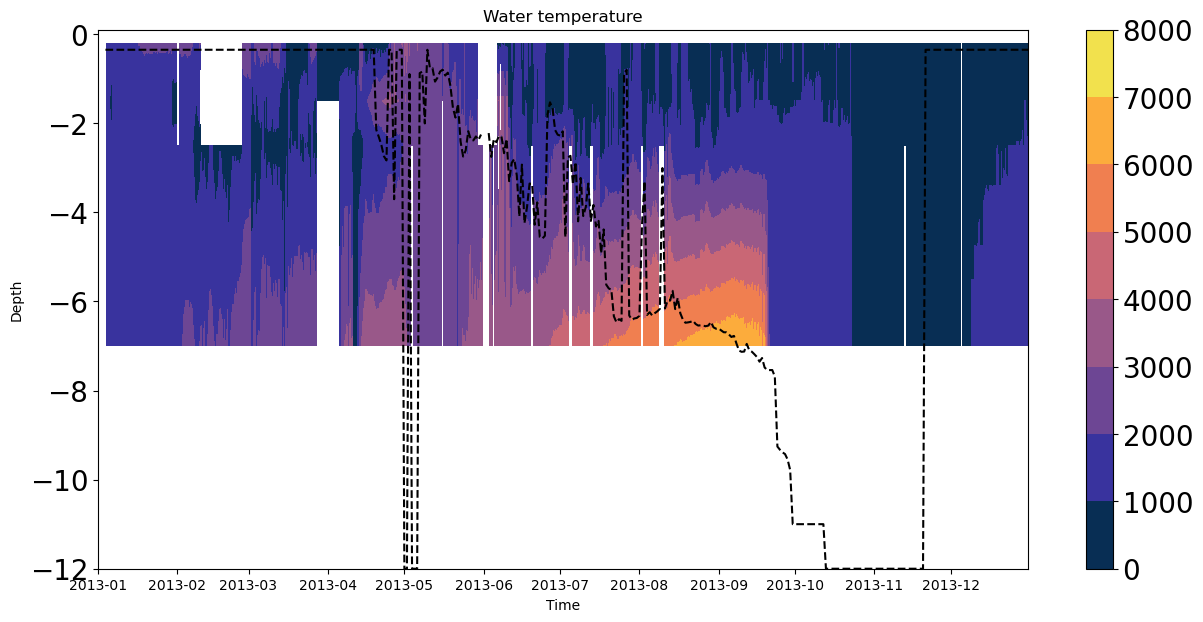

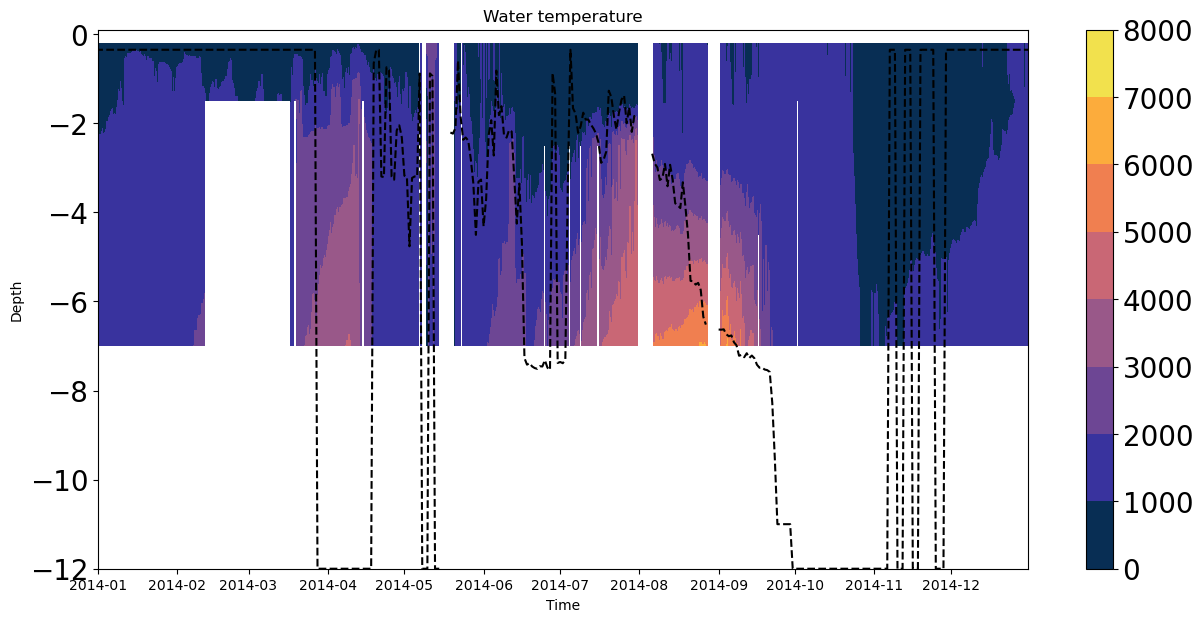

In [21]:
t_CO2 = len(np.unique(df_CO2.index.get_level_values(0)))
d_CO2 = 4
    
z = df_CO2.values.reshape(d_CO2, t_CO2)
x=np.unique(df_CO2.index.get_level_values(0))
y=np.unique(df_CO2.index.get_level_values(1))
X, Y = np.meshgrid(x,-y)
    
vmin, vmax = 0, 8000
    
cmap = cmocean.cm.thermal
plt.figure(figsize=(15,7))
plt.contourf(X, Y, z,cmap=cmap, vmin=vmin, vmax=vmax)
plt.plot(df_LAM_results['DateTime'],-df_LAM_results['thermD'],'--',color='k')
plt.title('Water temperature')
plt.xlabel('Time')
plt.ylabel('Depth')
#   a = plt.contour(X, Y, z,cmap=cmap, vmin=vmin, vmax=vmax)
plt.xlim([datetime.datetime(2013,1,1), datetime.datetime(2013,12,31)]) 
plt.ylim([-12, 0.1]) 
plt.colorbar()
plt.show()

plt.figure(figsize=(15,7))
plt.contourf(X, Y, z,cmap=cmap, vmin=vmin, vmax=vmax)
plt.plot(df_LAM_results['DateTime'],-df_LAM_results['thermD'],'--',color='k')
plt.title('Water temperature')
plt.xlabel('Time')
plt.ylabel('Depth')
#   a = plt.contour(X, Y, z,cmap=cmap, vmin=vmin, vmax=vmax)
plt.xlim([datetime.datetime(2014,1,1), datetime.datetime(2014,12,31)]) 
plt.ylim([-12, 0.1]) 
plt.colorbar()
plt.show()